In [179]:
# Dependencies
import requests, pprint
import json, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [180]:
url = "https://api.housecanary.com/v2/metrodiv/hpi_ts_historical"
hc_api_key="LHKCYFY7E213KH43BC7N HouseCanary"
hc_api_secret="p33A3GmGxwe4NPk0OhpaKb4ZtUzIXD5s"

In [181]:
params = {'metrodiv':'11244'}

response = requests.get(url,params=params,auth=(hc_api_key, hc_api_secret)) 
response = response.json()

print(json.dumps(response, indent=4))

{
    "message": "Invalid credentials"
}


In [172]:
#lookup by the metro area 
# params = {'metrodiv':'11244'}

# response = requests.get(url,params = params, auth=("", "")) 
# response = response.json()

# print(json.dumps(response, indent=4))


In [173]:
month= []
hpi_trend =[]
hpi_value=[]
hpi_distance=[]
hpi_real=[]


In [174]:
housing_frame = pd.DataFrame(response[0]['metrodiv/hpi_ts_historical']['result']['time_series'])

KeyError: 0

In [175]:
housing_frame.to_csv('Resources/House_Price_Index_Orange.csv')

NameError: name 'housing_frame' is not defined

In [176]:
housing_frame.head()

NameError: name 'housing_frame' is not defined

In [91]:
housing_frame['year'] = pd.to_datetime(housing_frame['month']).dt.year

In [99]:
# function for setting chart properties

def chart_propoerties (x,y, value):
    fig,ax = plt.subplots()
    ax = plt.plot(x=x,y=y)

    plt.title(f"{value}" )
    plt.xlabel('Year')
    plt.ylabel('hpi_value')
    plt.grid()
    plt.savefig(f'output/{value}.png')
    plt.show()

In [151]:
recent_data = housing_frame.loc[housing_frame['year'] > 2012, :]
recent_data.head()

,hpi_distance,hpi_real,hpi_trend,hpi_value,month,year
360,2.520701,216.852462,165.973539,247.529758,2006-01-01,2006
361,2.552342,217.978552,166.413757,248.939996,2006-02-01,2006
362,2.599852,219.305252,166.853975,250.831952,2006-03-01,2006
363,2.657587,220.174652,167.294193,253.087358,2006-04-01,2006
364,2.712064,221.446905,167.734411,255.310779,2006-05-01,2006


In [152]:
recent_data = recent_data.set_index('year')
recent_data.head()

,hpi_distance,hpi_real,hpi_trend,hpi_value,month
year,,,,,
2006,2.520701,216.852462,165.973539,247.529758,2006-01-01
2006,2.552342,217.978552,166.413757,248.939996,2006-02-01
2006,2.599852,219.305252,166.853975,250.831952,2006-03-01
2006,2.657587,220.174652,167.294193,253.087358,2006-04-01
2006,2.712064,221.446905,167.734411,255.310779,2006-05-01


In [186]:
group_data = recent_data.groupby('year')
group_data = group_data['hpi_value'].mean().round()
group_data.head()

year
2006    254.0
2007    244.0
2008    192.0
2009    162.0
2010    163.0
Name: hpi_value, dtype: float64

In [201]:
recent_data['rolling_mean']= recent_data['hpi_value'].rolling(window=2).mean()

recent_data.head()

,hpi_distance,hpi_real,hpi_trend,hpi_value,month,rolling_mean
year,,,,,,
2006,2.520701,216.852462,165.973539,247.529758,2006-01-01,NaN
2006,2.552342,217.978552,166.413757,248.939996,2006-02-01,248.234877
2006,2.599852,219.305252,166.853975,250.831952,2006-03-01,249.885974
2006,2.657587,220.174652,167.294193,253.087358,2006-04-01,251.959655
2006,2.712064,221.446905,167.734411,255.310779,2006-05-01,254.199068


In [202]:
years = group_data.keys()
print(years)

y_axis = group_data.values
y_axis

Int64Index([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
            2017, 2018],
           dtype='int64', name='year')


array([254., 244., 192., 162., 163., 153., 152., 177., 197., 208., 222.,
       238., 253.])

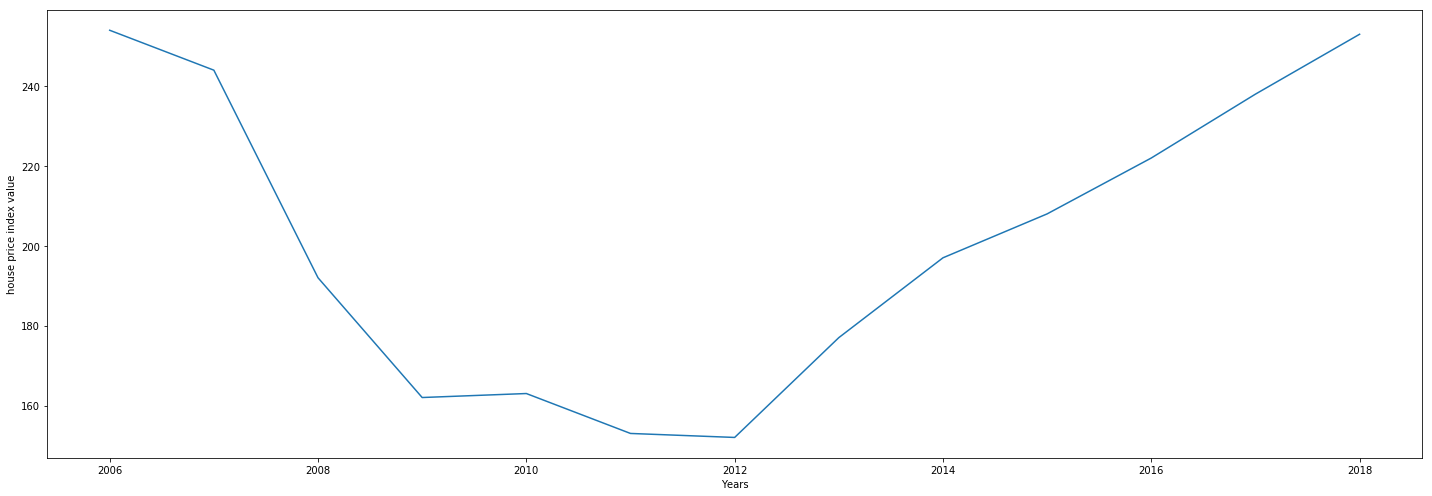

In [204]:
plt.figure(figsize=(20,7))
plt.plot(years, y_axis, label = 'House Price Index')
plt.xlabel('Years')
plt.ylabel('house price index value')
plt.tight_layout()

#chart_propoerties (x,y, 'House Price Index')

In [80]:
file = "Resources/YOY_Change.csv"
zip_df = pd.read_csv(file)
zip_df.head()

,All Home For Sale,Worksheet Filter,Inventory Yoy,Period End,Property Type,Region,State Code
0,8972,Year-Over-Year Change,-22.80%,1/31/12,All Residential,"Orange County, CA",CA
1,8464,Year-Over-Year Change,-29.70%,2/28/12,All Residential,"Orange County, CA",CA
2,7858,Year-Over-Year Change,-35.60%,3/31/12,All Residential,"Orange County, CA",CA
3,7360,Year-Over-Year Change,-40.60%,4/30/12,All Residential,"Orange County, CA",CA
4,6992,Year-Over-Year Change,-44.40%,5/31/12,All Residential,"Orange County, CA",CA


In [161]:
dates_final = []

for m in months:

    date = m.split('/')
    
    if date[0] == "1":
        monthformat = "Jan"
    elif date[0] == "2":
        monthformat = "Feb"
    elif date[0] == "3":
        monthformat = "Mar"
    elif date[0] == "4":
        monthformat = "Apr"
    elif date[0] == "5":
        monthformat = "May"
    elif date[0] == "6":
        monthformat = "Jun"
    elif date[0] == "7":
        monthformat = "Jul"
    elif date[0] == "8":
        monthformat = "Aug"
    elif date[0] == "9":
        monthformat = "Sep"
    elif date[0] == "10":
        monthformat = "Oct"
    elif date[0] == "11":
        monthformat = "Nov"
    else:
        monthformat = "Dec"

    year_format = date[2]
    date_format = monthformat + ' ' + year_format
    
    dates_final.append(date_format)
    
print(dates_final)

['Jan 12', 'Feb 12', 'Mar 12', 'Apr 12', 'May 12', 'Jun 12', 'Jul 12', 'Aug 12', 'Sep 12', 'Oct 12', 'Nov 12', 'Dec 12', 'Jan 13', 'Feb 13', 'Mar 13', 'Apr 13', 'May 13', 'Jun 13', 'Jul 13', 'Aug 13', 'Sep 13', 'Oct 13', 'Nov 13', 'Dec 13', 'Jan 14', 'Feb 14', 'Mar 14', 'Apr 14', 'May 14', 'Jun 14', 'Jul 14', 'Aug 14', 'Sep 14', 'Oct 14', 'Nov 14', 'Dec 14', 'Jan 15', 'Feb 15', 'Mar 15', 'Apr 15', 'May 15', 'Jun 15', 'Jul 15', 'Aug 15', 'Sep 15', 'Oct 15', 'Nov 15', 'Dec 15', 'Jan 16', 'Feb 16', 'Mar 16', 'Apr 16', 'May 16', 'Jun 16', 'Jul 16', 'Aug 16', 'Sep 16', 'Oct 16', 'Nov 16', 'Dec 16', 'Jan 17', 'Feb 17', 'Mar 17', 'Apr 17', 'May 17', 'Jun 17', 'Jul 17', 'Aug 17', 'Sep 17', 'Oct 17', 'Nov 17', 'Dec 17', 'Jan 18', 'Feb 18', 'Mar 18', 'Apr 18', 'May 18', 'Jun 18', 'Jul 18']


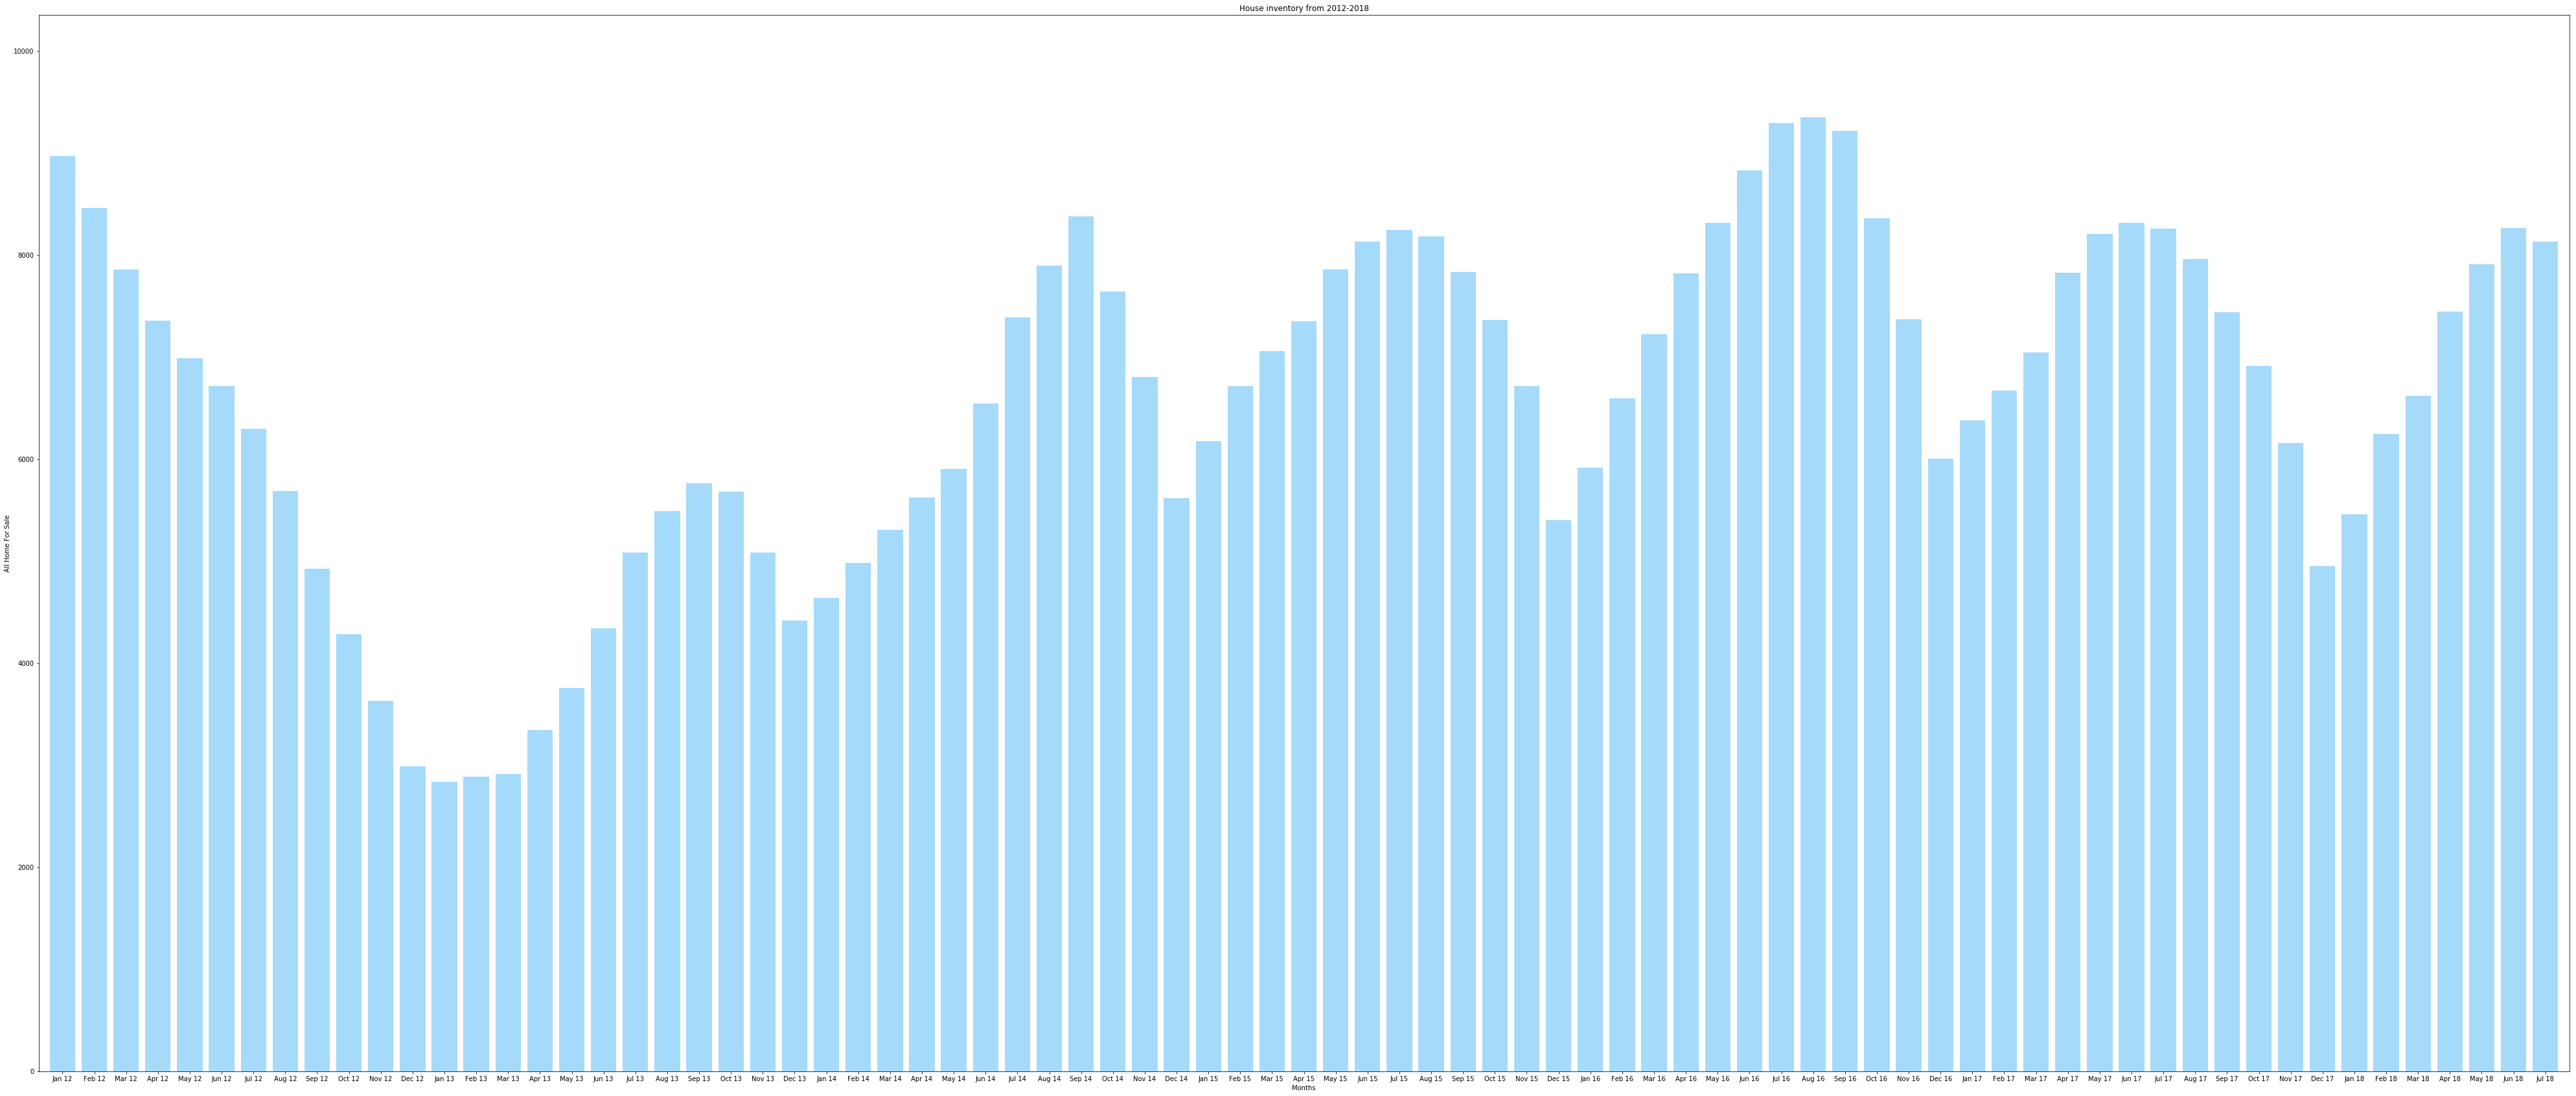

In [166]:
plt.figure(figsize=(70,30))

months = zip_df['Period End']
inventory = zip_df['All Home For Sale']

plt.title("House inventory from 2012-2018")
plt.xlabel("Months")
plt.ylabel("All Home For Sale")

plt.xlim(-0.75, len(dates_final)-.25)
plt.ylim(0, max(inventory) + 1000)

# modify months

plt.bar(dates_final, inventory, facecolor="lightskyblue", alpha=0.75, align="center")

plt.show()

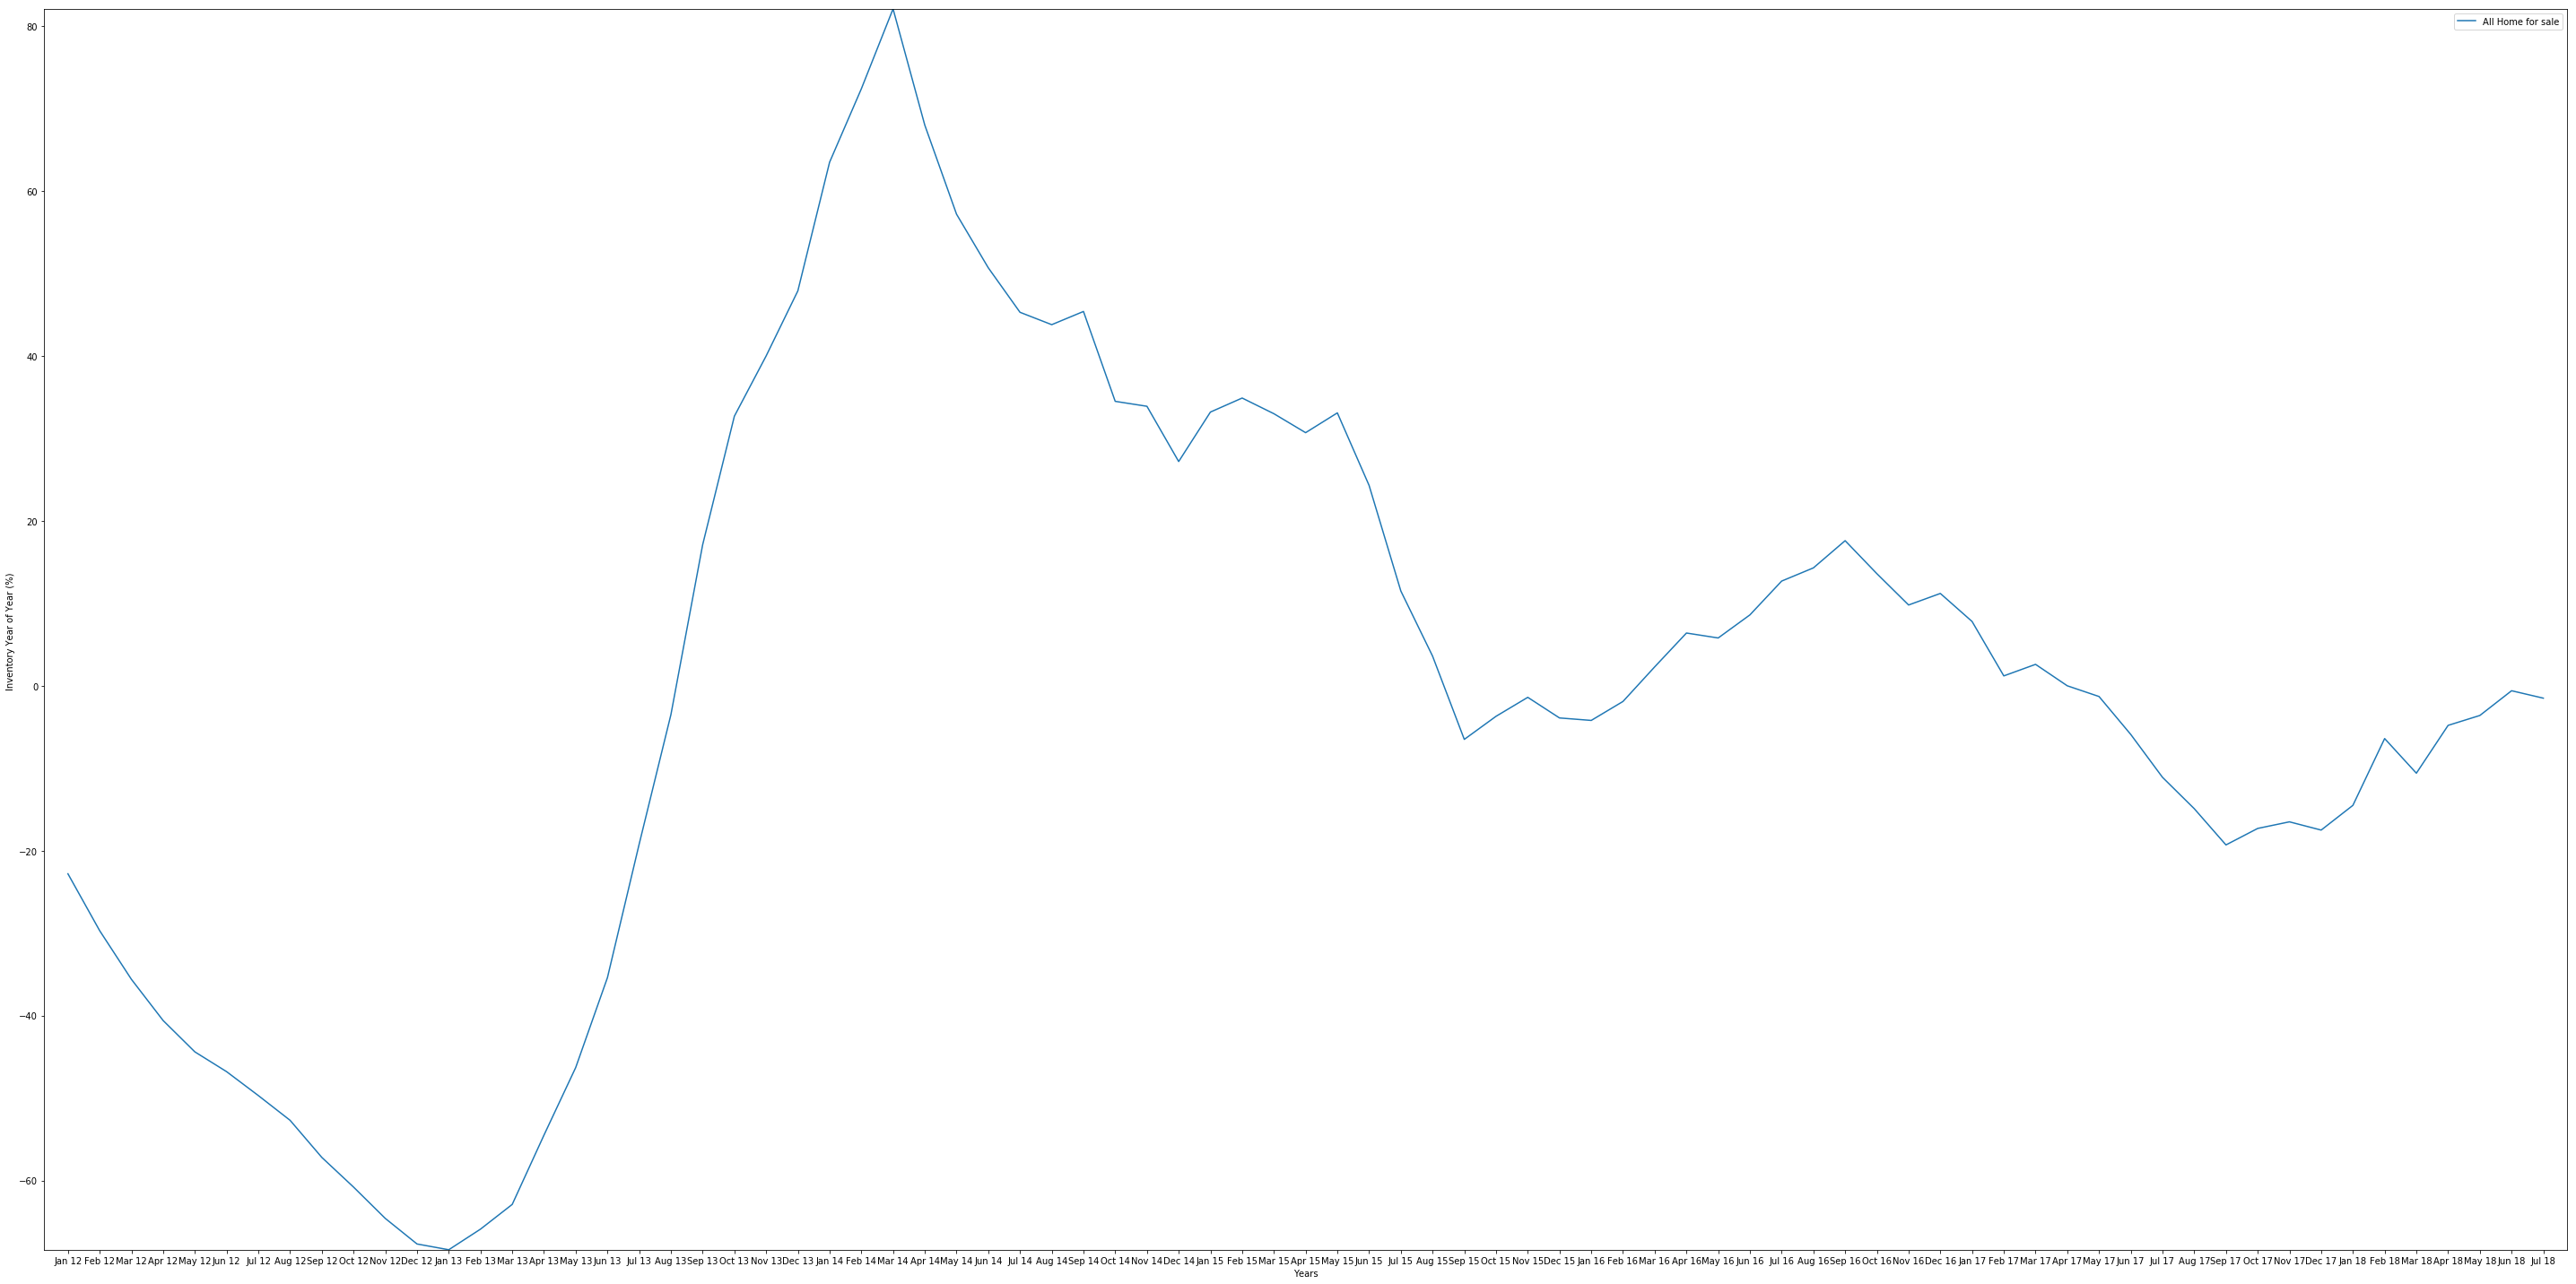

In [182]:
plt.figure(figsize=(40,20))

inventory_yoy=zip_df['Inventory Yoy']

inventory_final=[]

for i in inventory_yoy:
    inventory_0 = i.split('%')
    result = float(inventory_0[0])
    inventory_final.append(result)
    
    
plt.plot(dates_final, inventory_final, label = 'All Home for sale')
#plt.plot(years, y_axis, label = 'House Price Index')

plt.xlim(-0.75, len(years)-.25)
plt.ylim(min(inventory_final), max(inventory_final))

plt.xlabel('Years')
plt.ylabel('Inventory Year of Year (%) ')
plt.tight_layout()
plt.legend(loc="best")
